# E2 Diffusion of Information

## Data Loading and Preprocessing

In [42]:
import pandas as pd

In [84]:
# Load the data
nodes_df = pd.read_csv('/content/nodes.csv')

# filtering void names registers
filtered_nodes_df = nodes_df[nodes_df['name'].notna()]

filtered_nodes_df

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
...,...,...,...,...,...,...
156417,2ces6d2YsQP1RpGMYpdFy8,David Urwitz,5470.0,29,['classic swedish pop'],NaN
156418,6AeznZajNbXUulT7W4tK5l,Darmiko,2022.0,23,[],NaN
156419,3GEijIjrgb4lPe9WtURBzz,Katriell,268.0,0,[],NaN
156420,0ldQL0icSoMz9OOZcWG8Zt,Yung Fresh,181.0,19,[],NaN


In [85]:
# sort nodes by number of followers
sorted_nodes_df = filtered_nodes_df.sort_values(by='followers', ascending=False)
sorted_nodes_df

,spotify_id,name,followers,popularity,genres,chart_hits
14198,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,102156853.0,90,"['pop', 'uk pop']","['us (52)', 'gb (83)', 'ar (36)', 'au (65)', '..."
17604,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,83045090.0,88,"['dance pop', 'pop']","['us (81)', 'gb (69)', 'ar (36)', 'au (70)', '..."
18188,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,68407227.0,88,"['art pop', 'electropop', 'pop']","['us (46)', 'gb (43)', 'ar (23)', 'au (45)', '..."
18726,3TVXtAsR1Inumwj472S9r4,Drake,66852536.0,95,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'..."
6237,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,65590075.0,90,"['canadian pop', 'pop']","['us (58)', 'gb (51)', 'ar (29)', 'au (54)', '..."
...,...,...,...,...,...,...
43283,0tbZL3MhagNwBUZCq0NEea,Lil Kani,0.0,0,[],NaN
26079,4Jgl9FmNQF6ontIRyY19Ig,MC JL,NaN,18,['deep funk ostentacao'],NaN
105067,3cCFieWefBXyyDRsjNuArE,Christian Wagner,NaN,4,[],NaN
127808,1lLHQcDQFM03FcxZ5mQimA,Pekin Ibrahim,NaN,9,[],NaN


In [116]:
# selecting only the top artist
top_artists = sorted_nodes_df.head(119)
top_artists

,spotify_id,name,followers,popularity,genres,chart_hits
14198,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,102156853.0,90,"['pop', 'uk pop']","['us (52)', 'gb (83)', 'ar (36)', 'au (65)', '..."
17604,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,83045090.0,88,"['dance pop', 'pop']","['us (81)', 'gb (69)', 'ar (36)', 'au (70)', '..."
18188,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,68407227.0,88,"['art pop', 'electropop', 'pop']","['us (46)', 'gb (43)', 'ar (23)', 'au (45)', '..."
18726,3TVXtAsR1Inumwj472S9r4,Drake,66852536.0,95,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'..."
6237,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,65590075.0,90,"['canadian pop', 'pop']","['us (58)', 'gb (51)', 'ar (29)', 'au (54)', '..."
...,...,...,...,...,...,...
7349,07PdYoE4jVRF6Ut40GgVSP,Cartel De Santa,11843585.0,76,"['latin hip hop', 'mexican hip hop', 'narco rap']","['sv (3)', 'gt (3)', 'mx (19)']"
14496,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,11793779.0,81,"['lgbtq+ hip hop', 'pop']","['us (28)', 'gb (21)', 'ar (6)', 'au (21)', 'a..."
15305,0NGAZxHanS9e0iNHpR8f2W,Alok,11765605.0,79,"['electro house', 'pop nacional', 'slap house']","['us (1)', 'gb (2)', 'ar (1)', 'au (1)', 'at (..."
10550,0b1sIQumIAsNbqAoIClSpy,j-hope,11735876.0,75,"['k-pop', 'k-rap']","['us (2)', 'ar (2)', 'bo (3)', 'br (2)', 'bg (..."


In [117]:
edges_df = pd.read_csv('/content/edges.csv')

# Create a set of existing node IDs from the reduced nodes dataset
existing_ids = set(top_artists['spotify_id'])

# Filter the edges to only include those where both nodes exist in the reduced nodes set
filtered_edges_df = edges_df[edges_df['source'].isin(existing_ids) & edges_df['target'].isin(existing_ids)]

# Save the filtered edges DataFrame to a new CSV file
filtered_edges_df

,source,target
111,55Aa2cqylxrFIXC767Z865,6LuN9FCkKOj5PcnpouEgny
174,0hCNtLu0JehylgoiP8L4Gh,246dkjvS1zLTtiykXe5h60
631,1vCWHaC5f2uS3yhpwWbIA6,53XhwfbYqKCa1cC15pYq2q
937,1mcTU81TzQhprhouKaTkpq,7FNnA9vBm6EKceENgCGRMb
2189,15UsOTVnJzReFVN1VCnxy4,55Aa2cqylxrFIXC767Z865
...,...,...
295590,1Xyo4u8uXC1ZmMpatF05PJ,7CajNmpbOovFoOoasH2HaY
295610,1RyvyyTE3xzB2ZywiAwp0i,4MCBfE4596Uoi2O4DtmEMz
295669,0hCNtLu0JehylgoiP8L4Gh,7CajNmpbOovFoOoasH2HaY
299907,0oOet2f43PA68X5RxKobEy,4IKVDbCSBTxBeAsMKjAuTs


In [118]:
# Create a dictionary to map spotify_id to artist name
id_to_name_map = top_artists.set_index('spotify_id')['name'].to_dict()

# Map the IDs in the edges DataFrame to names
filtered_edges_df['source'] = filtered_edges_df['source'].map(id_to_name_map)
filtered_edges_df['target'] = filtered_edges_df['target'].map(id_to_name_map)

# Check for any unmapped values and replace them with 'Unknown Artist'
filtered_edges_df['source'].fillna('Unknown Artist', inplace=True)
filtered_edges_df['target'].fillna('Unknown Artist', inplace=True)

# Save the updated edges DataFrame to CSV
filtered_edges_df.to_csv('/content/updated_edges.csv', index=False)
filtered_edges_df

<ipython-input-118-e516bf6a8c94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_edges_df['source'] = filtered_edges_df['source'].map(id_to_name_map)
<ipython-input-118-e516bf6a8c94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_edges_df['target'] = filtered_edges_df['target'].map(id_to_name_map)
<ipython-input-118-e516bf6a8c94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,source,target
111,Lil Wayne,Khalid
174,Nicki Minaj,Post Malone
631,Avicii,Imagine Dragons
937,Rauw Alejandro,Anitta
2189,XXXTENTACION,Lil Wayne
...,...,...
295590,The Weeknd,Calvin Harris
295610,Future,Juice WRLD
295669,Nicki Minaj,Calvin Harris
299907,Shreya Ghoshal,Armaan Malik


## Network Visualization

In [119]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

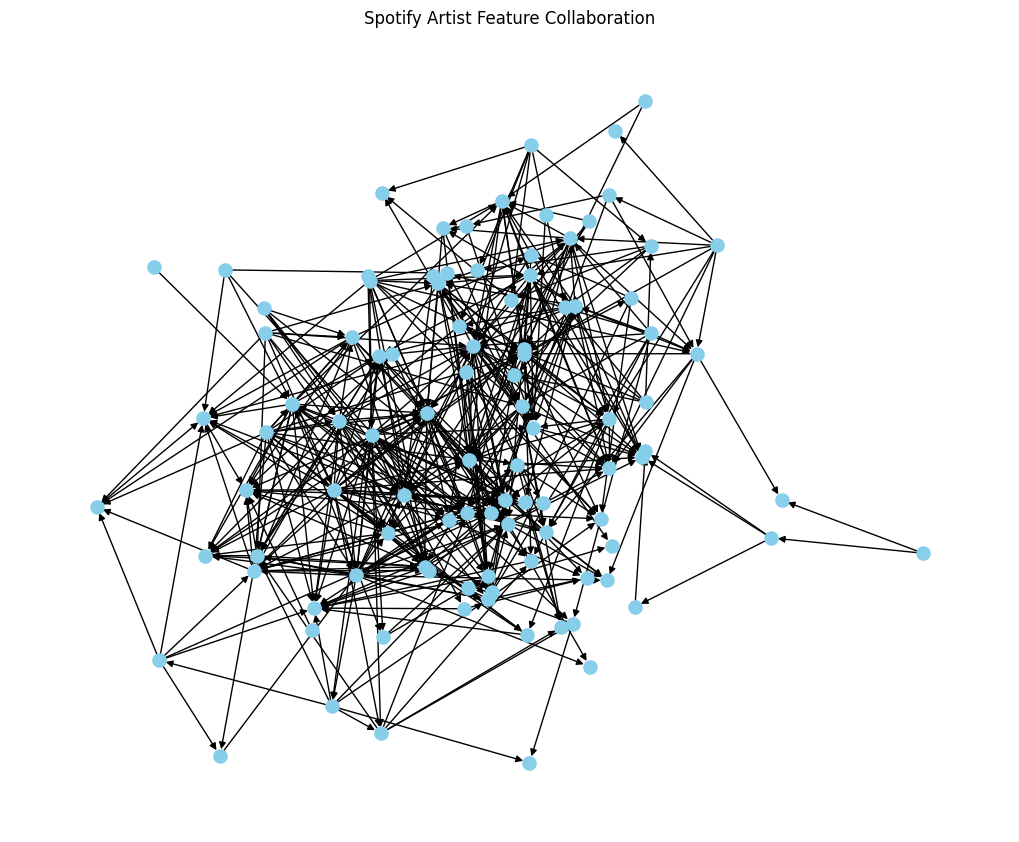

In [120]:
# Load the edges CSV file
edges_file_path = '/content/updated_edges.csv'
edges_data = pd.read_csv(edges_file_path)

# Create a graph from the edges data
G = nx.from_pandas_edgelist(edges_data, source='source', target='target', create_using=nx.DiGraph())

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=90, node_color="skyblue", pos=nx.kamada_kawai_layout(G))
plt.title("Spotify Artist Feature Collaboration")
plt.show()

In [121]:
# Determine the type of the graph
graph_type = {
    'is_bipartite': nx.is_bipartite(G),
    'is_directed': nx.is_directed(G),
    'is_undirected': not nx.is_directed(G),
    'is_planar': nx.check_planarity(G)[0]
}

# Print the results
for classification, result in graph_type.items():
    print(f"{classification}: {result}")

# Check if the graph is strongly connected
if nx.is_strongly_connected(G):
    print("The graph is strongly connected.")
else:
    print("The graph is not strongly connected.")

is_bipartite: False
is_directed: True
is_undirected: False
is_planar: False
The graph is not strongly connected.


In [122]:
# Determine the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 100
Number of edges: 437


In [123]:
nx.average_clustering(G)

0.16142706092783488

In [124]:
# Check if the graph is strongly connected
if nx.is_strongly_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    clustering_coefficient = nx.average_clustering(G)
    diameter = nx.diameter(G)
    eccentricity = nx.eccentricity(G)
    radius = nx.radius(G)
    periphery = nx.periphery(G)
    center = nx.center(G)
else:
    # For disconnected directed graphs, calculate these metrics for the largest strongly connected component
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_largest_scc = G.subgraph(largest_scc)
    avg_path_length = nx.average_shortest_path_length(G_largest_scc)
    clustering_coefficient = nx.average_clustering(G_largest_scc)
    diameter = nx.diameter(G_largest_scc)
    eccentricity = nx.eccentricity(G_largest_scc)
    radius = nx.radius(G_largest_scc)
    periphery = nx.periphery(G_largest_scc)
    center = nx.center(G_largest_scc)

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate Average Distance (mean shortest path length)
avg_distance = nx.average_shortest_path_length(G_largest_scc) if not nx.is_strongly_connected(G) else avg_path_length

# Display the results
network_characteristics = {
    'Number of nodes': num_nodes,
    'Number of edges': num_edges,
    'Average path length': avg_path_length,
    'Clustering coefficient': clustering_coefficient,
    'Diameter': diameter,
    'Eccentricity': dict(eccentricity),
    'Radius': radius,
    'Periphery': list(periphery),
    'Center': list(center),
    'Average distance': avg_distance
}

# Print the results
for characteristic, value in network_characteristics.items():
    print(f"{characteristic}: {value}")

Number of nodes: 100
Number of edges: 437
Average path length: 0
Clustering coefficient: 0.0
Diameter: 0
Eccentricity: {'Shawn Mendes': 0}
Radius: 0
Periphery: ['Shawn Mendes']
Center: ['Shawn Mendes']
Average distance: 0


## Information Diffusion

Given the nature of the network, an effective diffusion of information model would focus on how trends and influences propagate across the network. The chosen model is the **Influence Maximization**.

This model focuses on identifying a set of key artists who are most influential in spreading information across the network efficiently. Since the network includes artist with variying degrees of connectivity and centrality, this model can help identify those artists who, if targeted effectively, could maximize the spread of new music trends.

Using algorithms like the Greedy Algorithm approaches to predict the most influential nodes based on their network characteristics.

In [125]:
import random
from copy import deepcopy
import imageio
from IPython.display import Image

In [126]:
def independent_cascade_model(G, initial_active, centrality, P=0.5):
  '''
  Simulate the information spread using the independent cascade model with
  probabilities based on centrality measures.

  Parameters:
  - G (network.Graph): Input graph
  - initial_active (list): List of initially active nodes
  - centrality (dict): Node centrality values to set probabilities
  - P (float): Probability of activation

  Returns:
  - steps (list): List of graph states at each step
  - iterations (int): Number of iterations until no further nodes can be
    activated
  - final_active_nodes (set): Set of nodes that were activated by the end of the
    simulation
  '''
  # Initialize
  active_nodes = set(initial_active)
  new_active_nodes = set(initial_active)
  steps = [deepcopy(G)]

  for node in G.nodes():
    G.nodes[node]['state'] = 'Active' if node in active_nodes else 'Inactive'

  iterations = 0

  # Iterate
  while new_active_nodes:
    iterations += 1
    current_active_nodes = new_active_nodes
    new_active_nodes = set()

    for node in current_active_nodes:
      for neighbor in G.successors(node):
        if G.nodes[neighbor]['state'] == 'Inactive':
          activation_prob = centrality[neighbor] / sum(centrality.values())
          if activation_prob < P:
            new_active_nodes.add(neighbor)
            G.nodes[neighbor]['state'] = 'Active'

    active_nodes.update(new_active_nodes)
    steps.append(deepcopy(G))

  return steps, iterations, active_nodes

In [127]:
def estimate_spread(G, S, centrality, num_simulations=100):
  '''
  Estimate the spread of influence for a given seed set using multiple simulations.

  Parameters:
  - G (networkx.DiGraph): Input directed graph
  - S (set): Set of initially activated nodes (seed set)
  - centrality (dict): Node centrality values to set probabilities
  - num_simulations (int): Number of simulations to run (default 100)

  Returns:
  - final_spread_details (dict): Details of the last simulation including activated nodes
  '''
  total_activated = 0
  for _ in range(num_simulations):
    steps, _, _ = independent_cascade_model(G, S, centrality, P=0.5)
    activated_nodes = set(node for step in steps for node in G if G.nodes[node]['state']=='Active')
    total_activated += len(activated_nodes)

  return total_activated / num_simulations

In [128]:
def greedy_algorithm(G, k, centrality, num_simulations=100):
  '''
  Find the seed set with size k that maximizes the influence using the Greedy
  Algorithm.

  Parameters:
  - G (networkx.DiGraph): Input directed graph
  - k (int): Size of the seed set
  - centrality (dict): Node centrality values to set probabilities
  - num_simulations (int): Number of simulations to estimate the spread (default 100)

  Returns:
  - S (set): Seed set of size k that maximizes the influence
  '''
  S = set()
  for _ in range(k):
    best_node = None
    best_spread = 0
    for node in G.nodes():
      if node not in S:
        current_spread = estimate_spread(G, S | {node}, centrality, num_simulations)
        if current_spread > best_spread:
          best_spread = current_spread
          best_node = node
    S.add(best_node)
  return S

In [129]:
# Find the optimal seed set using the greedy algorithm
centrality = nx.degree_centrality(G)
k = 10
seed_set = greedy_algorithm(G, k, centrality, num_simulations=100)
print(f"Optimal seed set of size {k}: {seed_set}")

Optimal seed set of size 10: {'Alok', 'Maroon 5', 'XXXTENTACION', 'Selena Gomez', 'Sebastian Yatra', 'Travis Scott', '2Pac', 'Jorge & Mateus', 'Badshah', 'Bruno Mars'}


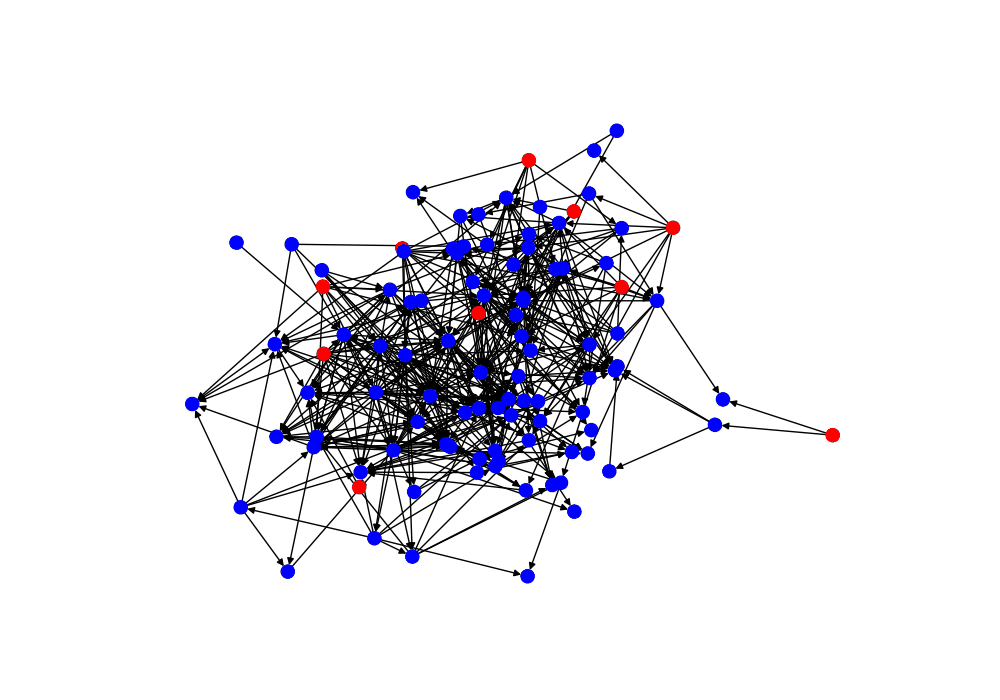

Number of final activated nodes: 90
List of final activated nodes: ['Christian Nodal', 'Migos', 'Martin Garrix', 'KAROL G', 'Maroon 5', 'Sia', 'Justin Timberlake', 'Michael Jackson', 'Imagine Dragons', 'Rauw Alejandro', 'Jennifer Lopez', 'BTS', 'Rihanna', 'XXXTENTACION', 'Chris Brown', 'Becky G', 'Bad Bunny', 'ZAYN', '2Pac', 'Badshah', 'Future', 'Ariana Grande', 'Metallica', 'The Chainsmokers', 'Maluma', 'Travis Scott', 'Camilo', 'Dua Lipa', 'Sam Smith', 'Alan Walker', 'Kanye West', 'Justin Bieber', 'Katy Perry', 'Doja Cat', 'Marília Mendonça', 'Marshmello', 'Nicky Jam', 'Jorge & Mateus', 'Anitta', 'Anuel AA', 'Ozuna', 'The Weeknd', 'David Guetta', 'Charlie Puth', 'Guru Randhawa', 'Billie Eilish', 'Lil Uzi Vert', 'Shawn Mendes', 'Daddy Yankee', 'Selena Gomez', 'Romeo Santos', 'Miley Cyrus', 'Drake', 'Gusttavo Lima', 'Calvin Harris', 'Avicii', 'Armaan Malik', 'Arijit Singh', 'Ed Sheeran', 'Lil Wayne', 'Zé Neto & Cristiano', 'Lil Nas X', 'Bruno Mars', 'Cardi B', 'BLACKPINK', 'Post Malone

In [132]:
# Showing a simulation using those nodes
nx.set_node_attributes(G, 'Inactive', 'state')
for node in seed_set:
  G.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations, final_active_nodes = independent_cascade_model(G, seed_set, centrality, P=0.5)

# Position for the layout (fixed)
pos = nx.kamada_kawai_layout(G)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, ax=ax, node_size=90)

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

print(f"Number of final activated nodes: {len(final_active_nodes)}")
print(f"List of final activated nodes: {list(final_active_nodes)}")